## **PARTIE 1 : FEATURES EXTRACTION (Fixation maps, Saliency maps)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [197]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

In [8]:
%matplotlib inline

import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter
import scipy.io

PATH_DATA = "/content/drive/MyDrive/"

# Experiment-dependant constants
RESO_X = 1280
RESO_Y = 1024
FACTOR_X = RESO_X/386  
FACTOR_Y = RESO_Y/289

In [10]:
def get_files_all_observers(dir_path, img_name):
    """
    List all eye-tracking data files related to a particular image.
    
    :param dir_path: str, the path to the directory in which the dataset is stored.
    :param img_name: str, the name of the image for which we want to gather eye-tracking data.
                     This must be of the form img.trn.xxx or img.tst.xxx
    :return list_all_files: list, containing the paths to all the relevant eye-tracking files.
    """
    list_all_files = glob.glob(os.path.join(dir_path, 'Data/**/*' + img_name + '.*'), recursive=True)
    assert list_all_files, "List of eye-tracking files seem to be empty. Check directory or image name."
    return list_all_files

def compute_ppda(distance, h_res, v_res, screen_w, screen_h):
    """
    Compute the number of pixels per degree of visual angle based on the experimental conditions.
    
    :param distance: int, the distance between the observer and the screen (in mm)
    :param h_res: int, the horizontal resolution of the screen
    :param v_res: int, the vertical resolution of the screen
    :param screen_w: int, the width of the screen (in mm)
    :param screen_h: int, the height of the screen (in mm)
    :return horizontal_ppda: float, the number of pixel per degree of visual angle
    """    
    ###### TODO ######

    h_1 = 2*distance*np.tan(0.5*math.pi/180)

    horizontal_ppda = h_res*h_1/screen_h


    
    return horizontal_ppda
def salmap_from_fixmap(fixmap, ppda):
    """
    Generate a visual saliency map, based on the fixation map.
    
    :param fixmap: numpy array, the fixation map
    :param ppda: float, the number of pixels per degree of visual angle
    :return salmap: numpy array, the visual saliency map
    """

    ###### TODO ######
    salmap = gaussian_filter(fixmap , ppda)
    salmap = salmap - salmap.min()
    salmap = salmap/salmap.max()


    return salmap

In [84]:
def create_fixmap(list_obs_files, img_w, img_h, factor_x, factor_y):

    fixmap = np.zeros((img_h, img_w))
    
    #list_obs_files = get_files_all_observers(PATH_DATA,'i1014163009')

    

    for obs in list_obs_files:
      # We will read the files and store them in a pandas dataframe.
      # If you are not familiar with pandas : https://pandas.pydata.org/docs/user_guide/index.html
      data = scipy.io.loadmat(obs)
      name_file=os.path.basename(obs)
      name_file=name_file.replace(".mat",'')
      #name_file=name_file.replace(".mat",'')
      img = mpimg.imread((os.path.join(PATH_DATA, 'Stimuli/' +name_file+ '.jpeg')))
      width=img.shape[1]
      height=img.shape[0]


      FACTOR_X = RESO_X/width
      FACTOR_Y = RESO_Y/height

      arr=data[name_file][0][0][4][0][0][2].astype('float64')
      
      df = pd.DataFrame(arr)

      
        #print(i)
        
      for i  in range(len(df)):
        x = df.loc[i][0]
        y = df.loc[i][1]
  
        
        xf = x*FACTOR_X/2+width/10
        yf = y*FACTOR_Y/2+height/8

        if (0 <= xf < width) and (0 <= yf < height):
            fixmap[int(yf)][int(xf)] += 1
                
    return fixmap,width,height

In [179]:
list_img1 = get_files_all_observers(PATH_DATA, 'i1082647')
img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/i1082647.jpeg"))
height_=img.shape[0]
width_=img.shape[1]
fixmap,height,width = create_fixmap(list_img1, width_, height_, FACTOR_X, FACTOR_Y)
img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/i1082647.jpeg"))
# Values for the PPDA computation / image sizes / etc come from the experimental conditions.
# You can go read the associated paper for more information !
# J. Wang, D. M. Chandler, P. Le Callet, "Quantifying the relationship between visual salience and visual importance", Spie Human and Electronic imaging (HVEI) XV, San Jose, 2010

ppda = compute_ppda(609.6, 1280, 1024, 386,289)
salmap = salmap_from_fixmap(fixmap, ppda)

In [190]:
import matplotlib.pyplot as plt
import numpy as np

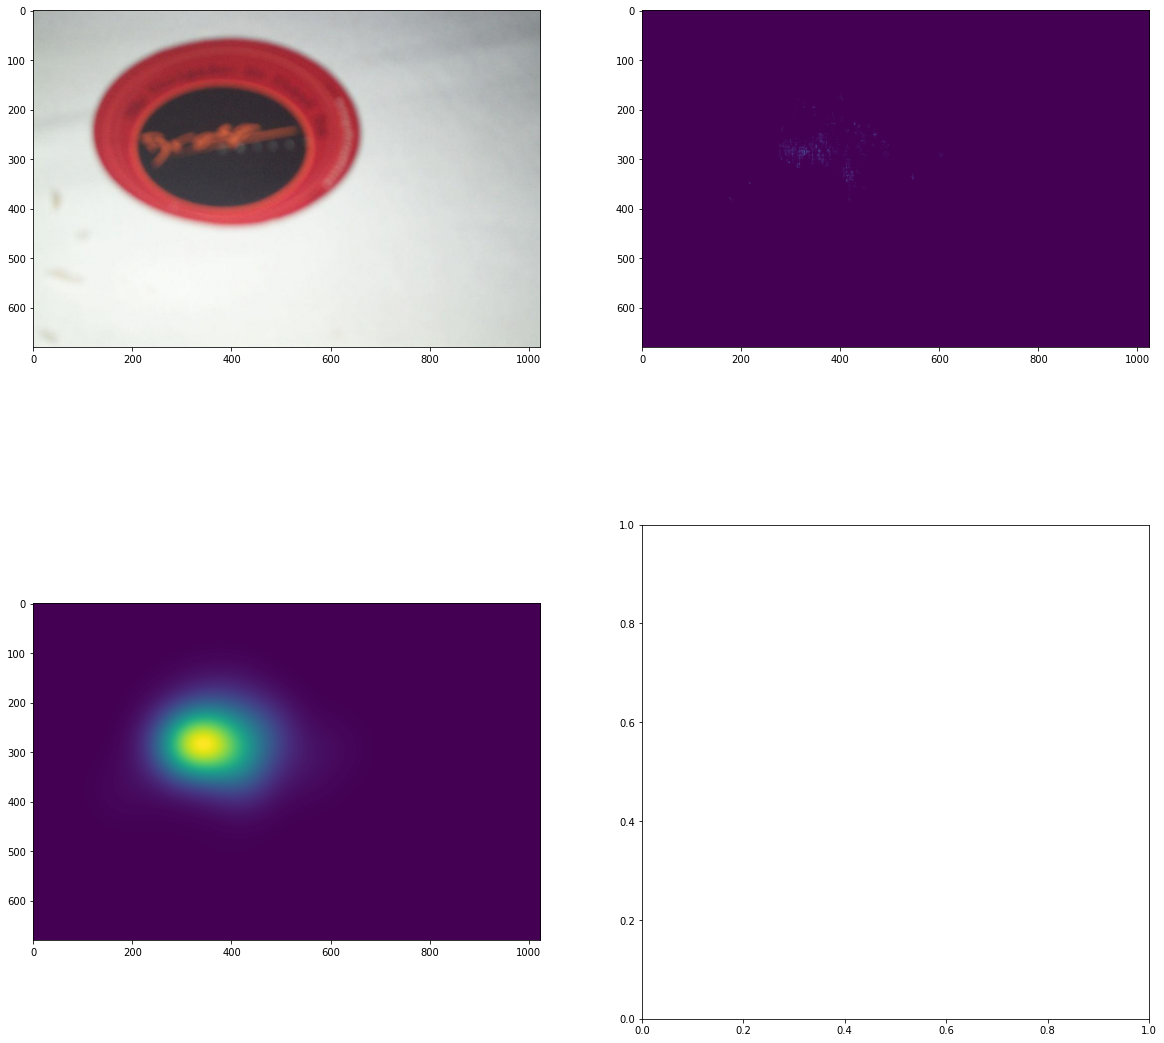

In [200]:

f, axarr = plt.subplots(2,2,figsize=(20, 20))
axarr[0,0].imshow(img)
axarr[0,1].imshow(fixmap)
axarr[1,0].imshow(salmap)


In [201]:
list_img1 = get_files_all_observers(PATH_DATA, 'i12049788')
img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/i12049788.jpeg"))
height_=img.shape[0]
width_=img.shape[1]
fixmap,height,width = create_fixmap(list_img1, width_, height_, FACTOR_X, FACTOR_Y)
img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/i12049788.jpeg"))
# Values for the PPDA computation / image sizes / etc come from the experimental conditions.
# You can go read the associated paper for more information !
# J. Wang, D. M. Chandler, P. Le Callet, "Quantifying the relationship between visual salience and visual importance", Spie Human and Electronic imaging (HVEI) XV, San Jose, 2010

ppda = compute_ppda(609.6, 1280, 1024, 386,289)
salmap = salmap_from_fixmap(fixmap, ppda)

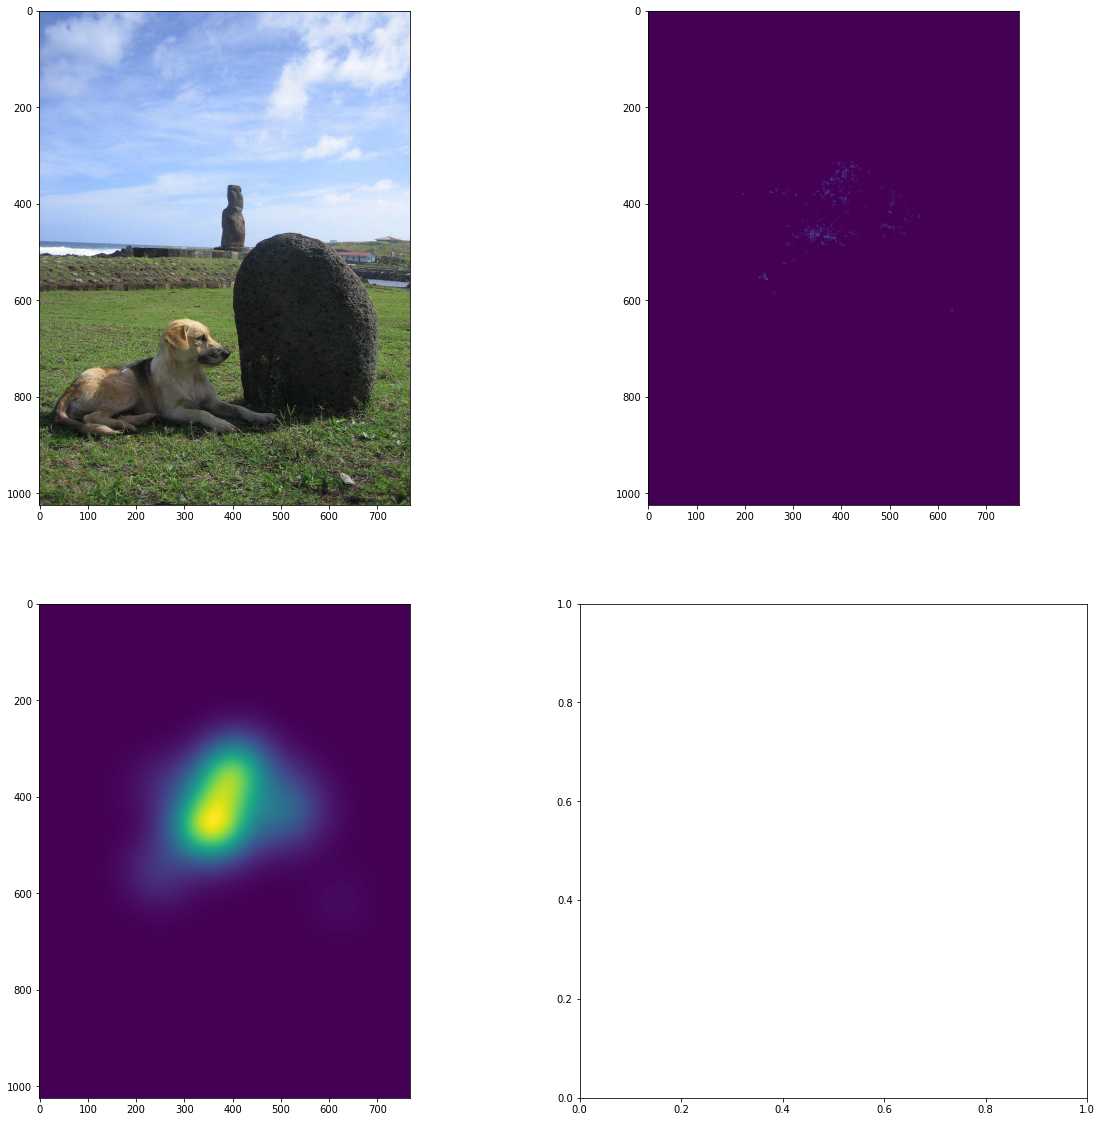

In [202]:

f, axarr = plt.subplots(2,2,figsize=(20, 20))
axarr[0,0].imshow(img)
axarr[0,1].imshow(fixmap)
axarr[1,0].imshow(salmap)


### **Mass Feature extraction - ground-truth data**

In [204]:
import glob
fixmap_=[]
ppda_=[]
salmap_=[]
i=0
for pic,i in zip((glob.glob("/content/drive/MyDrive/Stimuli/*")),range(0,24)):
  name_file=os.path.basename(pic)
  name_file=name_file.replace(".jpeg",'')
  list_img1 = get_files_all_observers(PATH_DATA, name_file)
  img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/"+name_file+".jpeg"))
  height_=img.shape[0]
  width_=img.shape[1]
  print(name_file)
  fixmap,height,width = create_fixmap(list_img1, width_, height_, FACTOR_X, FACTOR_Y)
  img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/"+name_file+".jpeg"))
  # Values for the PPDA computation / image sizes / etc come from the experimental conditions.
  # You can go read the associated paper for more information !
  # J. Wang, D. M. Chandler, P. Le Callet, "Quantifying the relationship between visual salience and visual importance", Spie Human and Electronic imaging (HVEI) XV, San Jose, 2010

  ppda = compute_ppda(609.6, 1280, 1024, 386,289)
  salmap = salmap_from_fixmap(fixmap, ppda)
  fixmap_.append(fixmap)
  ppda_.append(ppda)
  salmap_.append(salmap)
  print(i)

i05june05_static_street_boston_p1010800
1
i05june05_static_street_boston_p1010808
2
i05june05_static_street_boston_p1010816
3
i05june05_static_street_boston_p1010855
4
i05june05_static_street_boston_p1010885
5
i05june05_static_street_boston_p1010907
6
i1000274881
7
i1000978947
8
i1007068829
9
i1011319098
10
i1014163009
11
i1016451573
12
i1019046221
13
i1019928312
14
i1021218710
15
i1023439436
16
i1022085609
17
i1025035805
18
i102423191
19
i1025113889
20
i1025132509
21
i103134560
22
i1031604161
23
i1031917817
24


## **Application of the chosen Models and Evaluation**

---------Achanta's Model---------

In [205]:
from Achanta import *

obj=Achanta()

In [206]:
ll_=[]
i=0

for pic,i in zip((glob.glob("/content/drive/MyDrive/Stimuli/*")),range(0,24)):
    name_file=os.path.basename(pic)
    name_file=name_file.replace(".jpeg",'')
    #plist_img1 = get_files_all_observers(PATH_DATA, name_file)
    img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/"+name_file+".jpeg"))
    ll=obj.get_salmap(img)
    ll_.append(ll)

In [207]:
len(ll_),len(salmap_)

(24, 24)

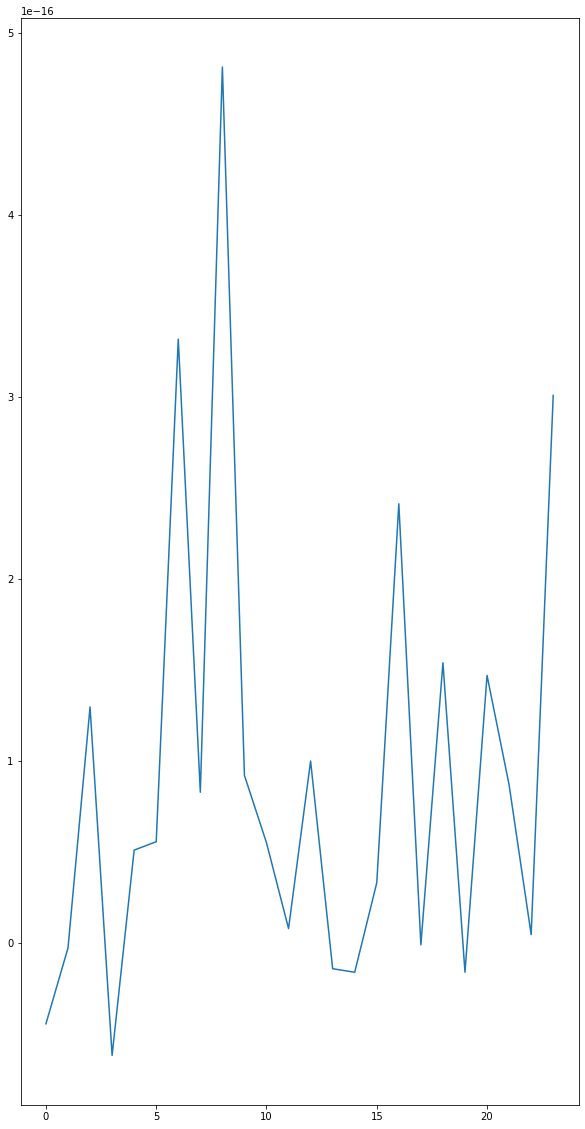

In [208]:

from evaluation import *


NSS_metric=[]
Auc_Borji_metric=[]
similarity_metric=[]
kl_div_metric=[]

gt1=ll
gt2=salmap
for i in range(0,24):
  #gt = create_examples(100, i, [[25, 25]], [1])
  NSS_metric.append(NSS(salmap_[i], ll_[i]))
  similarity_metric.append(similarity(salmap_[i], ll_[i]))
  kl_div_metric.append(kl_divergence(salmap_[i],ll_[i]))
 
  Auc_Borji_metric.append(AUC_Borji(salmap_[i], ll_[i]))
  AUC_Borji(salmap, fixmap, Nsplits=100, stepSize=0.1)



plt.plot(NSS_metric)

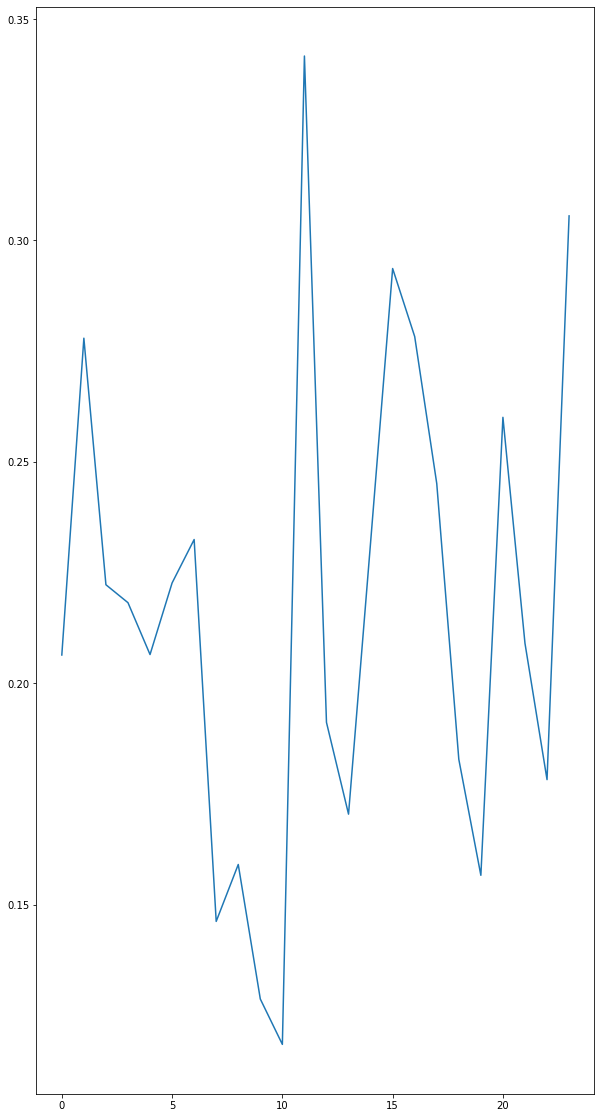

In [209]:
plt.plot(similarity_metric)

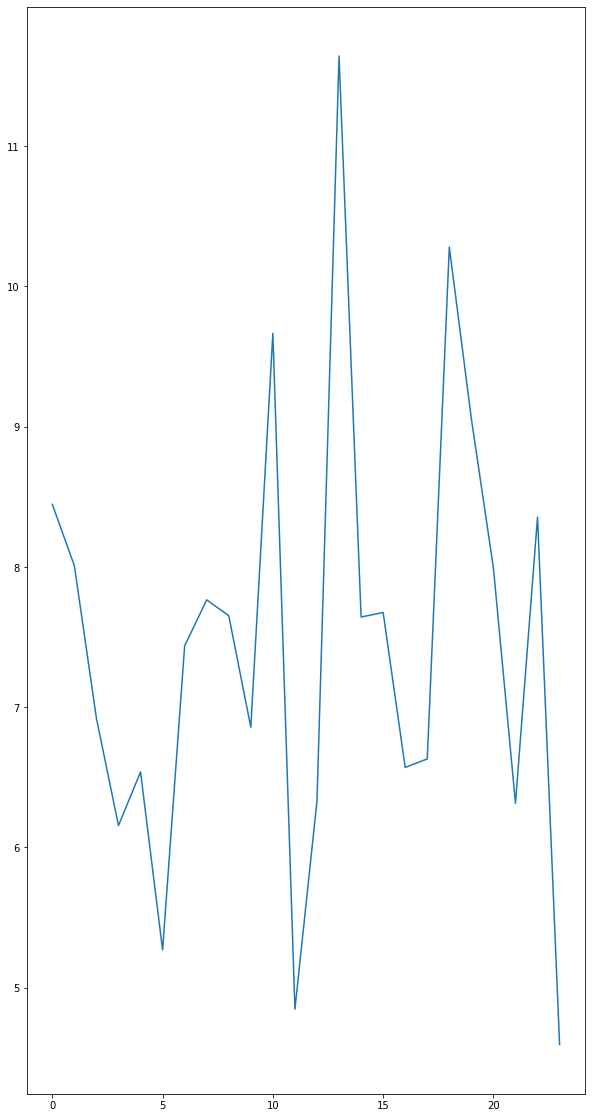

In [210]:
plt.plot(kl_div_metric)

## **Itti-Koch model**

In [147]:
!git clone https://github.com/akisatok/pySaliencyMap.git

Cloning into 'pySaliencyMap'...
remote: Enumerating objects: 54, done.
remote: Total 54 (delta 0), reused 0 (delta 0), pack-reused 54
Unpacking objects: 100% (54/54), done.


In [219]:
from Itti_Koch_10 import *
from pySaliencyMap import pySaliencyMapDefs


ll_kosh=[]
i=0

for pic,i in zip((glob.glob("/content/drive/MyDrive/Stimuli/*")),range(0,24)):
    name_file=os.path.basename(pic)
    name_file=name_file.replace(".jpeg",'')
    #plist_img1 = get_files_all_koshobservers(PATH_DATA, name_file)
    img = mpimg.imread(os.path.join(PATH_DATA, "Stimuli/"+name_file+".jpeg"))
    obj=pySaliencyMap(img.shape[1],img.shape[0])
    ss=obj.SMGetSM(img)
    ll_kosh.append(ss)
    

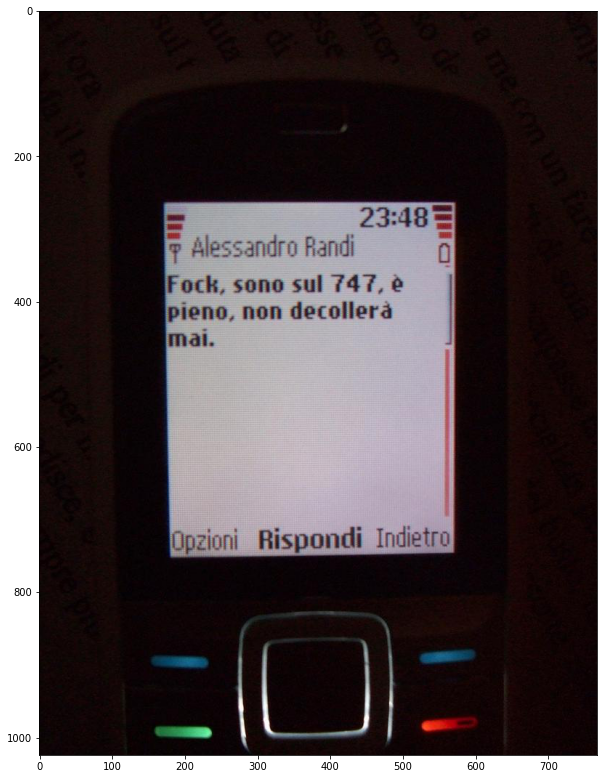

In [154]:
plt.imshow(img)

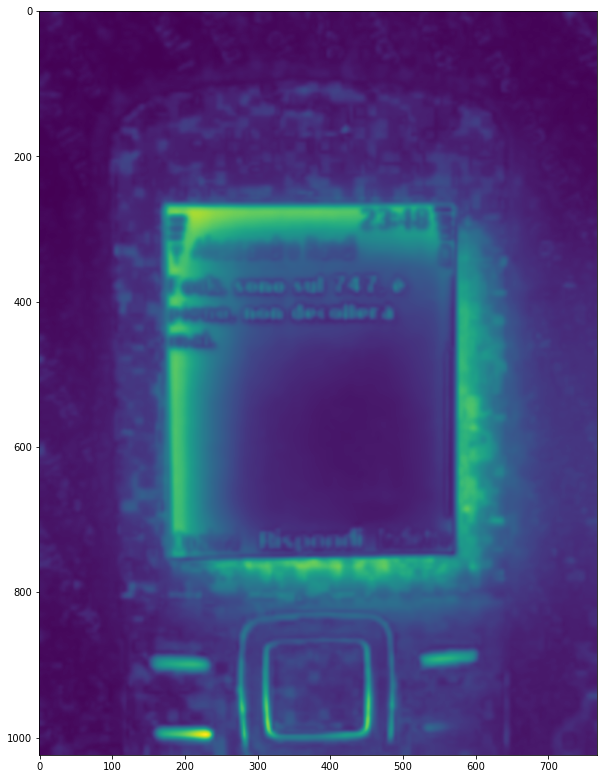

In [160]:
plt.imshow(ss)

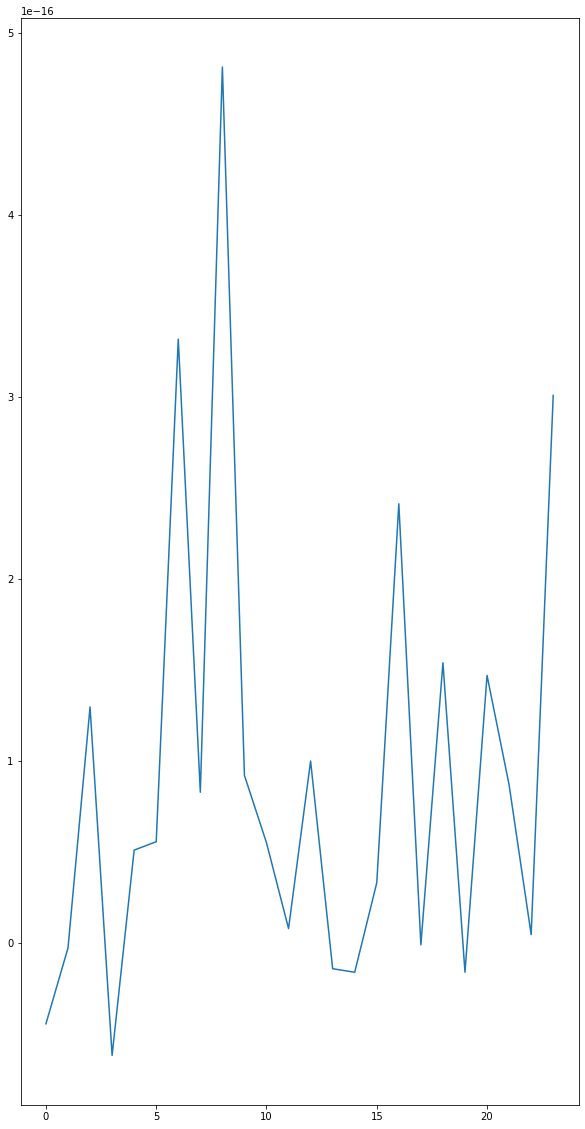

In [214]:

from evaluation import *




NSS_metric=[]
Auc_Borji_metric=[]
similarity_metric=[]
kl_div_metric=[]


for i in range(0,24):
  #gt = create_examples(100, i, [[25, 25]], [1])
  NSS_metric.append(NSS(salmap_[i], ll_kosh[i]))
  similarity_metric.append(similarity(salmap_[i], ll_kosh[i]))
  kl_div_metric.append(kl_divergence(salmap_[i],ll_kosh[i]))
 
  #Auc_Borji_metric.append(AUC_Borji(salmap_[i], ll_kosh[i]))
  #AUC_Borji(salmap, fixmap, Nsplits=100, stepSize=0.1)



plt.plot(NSS_metric)

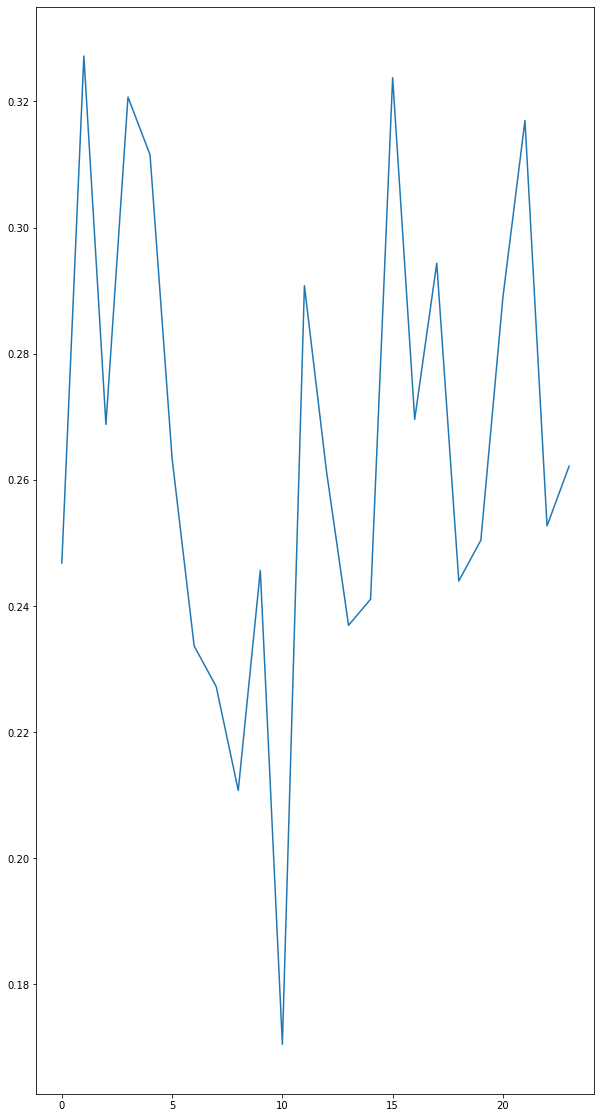

In [215]:
plt.plot(similarity_metric)

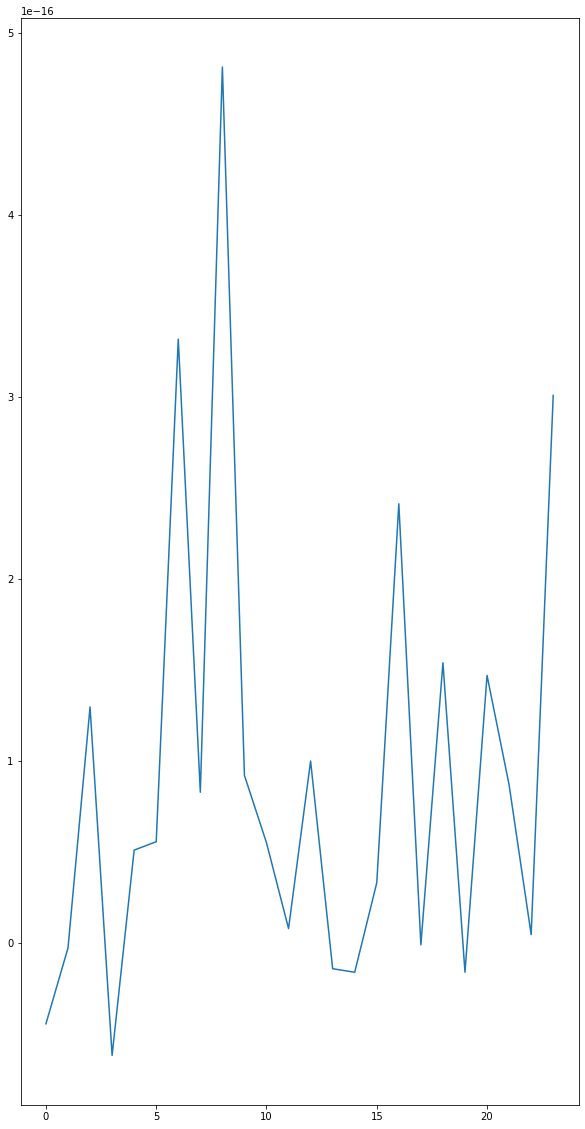

In [216]:
plt.plot(NSS_metric)

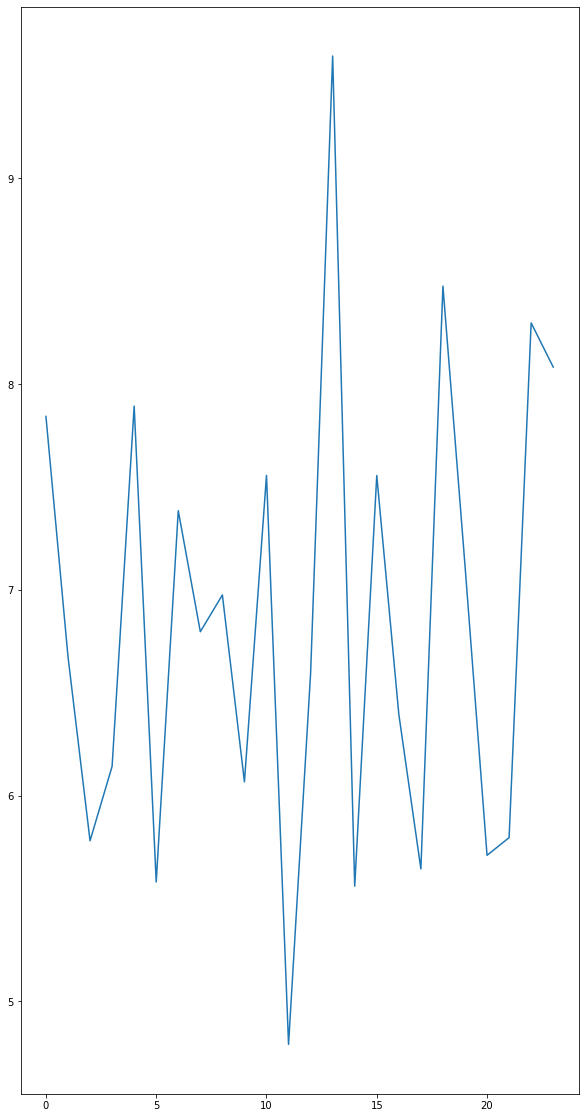

In [217]:
plt.plot(kl_div_metric)